In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'C:\Users\mwary\Documents\SQL\movies.csv')

In [12]:
# Looking at the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [3]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%.'.format(col, round(pct_missing, 1)))

name - 0.0%.
rating - 0.0%.
genre - 0.0%.
year - 0.0%.
released - 0.0%.
score - 0.0%.
votes - 0.0%.
director - 0.0%.
writer - 0.0%.
star - 0.0%.
country - 0.0%.
budget - 0.3%.
gross - 0.0%.
company - 0.0%.
runtime - 0.0%.


In [4]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [2]:
# Replacing Missing data with 0 

df = df.fillna(0)

In [13]:
# Getting rid of decimal places by changing data types

df['budget'] = df['budget'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [14]:
# Creating corrected year column to match release year

NewDataFrame = df["released"].str.split(" ",n=3,expand = True) 
NewDataFrame.rename(columns={0: "Month", 1: "day",2:"Year",3:"Country"}, inplace=True)
df['yearcorrect'] = NewDataFrame['Year']

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [4]:
# Order by gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
# Expand table to see all the data

pd.set_option('display.max_rows', None)

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [16]:
# Drop any duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


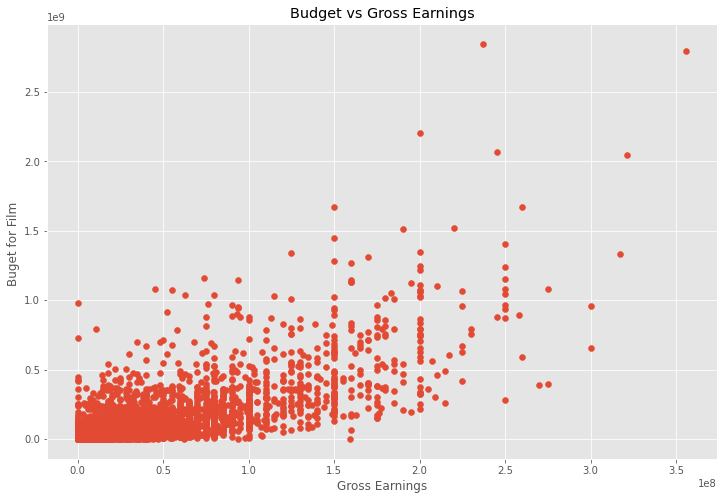

In [13]:
# scatter plot of budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Buget for Film ')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

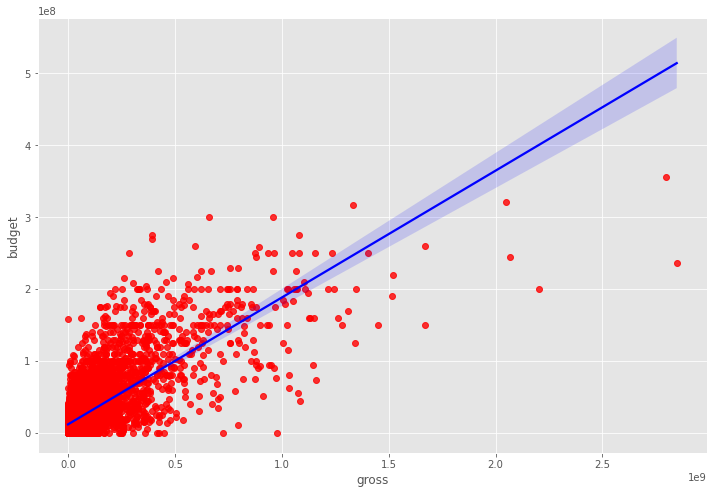

In [6]:
# regression plot of budget vs gross 

sns.regplot(x="gross", y="budget", data=df, line_kws={'color':'blue'}, scatter_kws={'color':'red'})

In [19]:
df.corr(method='pearson') # correlation methods: pearson (default), kendall, spearman 

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


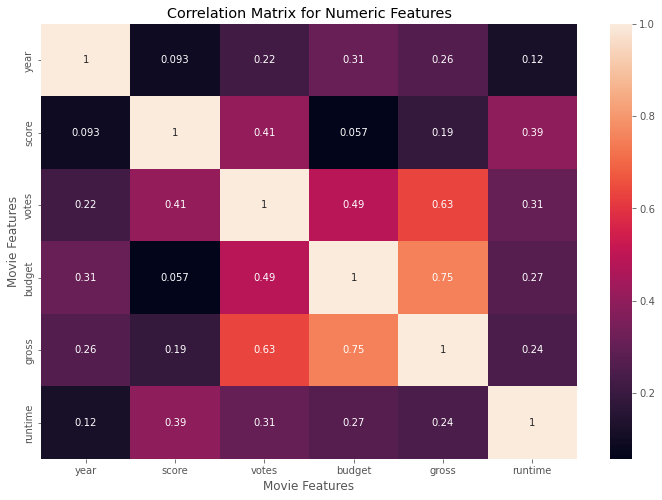

In [20]:
# Heat map of numeric correlaitons 

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True) #annotations

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [7]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.344538,0.138367,0.253906,0.656262,0.110209,0.599044,0.720119,0.782929,0.653260,0.193910,0.111217,0.978147,0.686234,0.074640
rating,0.344538,1.000000,-0.014784,0.036004,0.263736,-0.065247,0.157686,0.283992,0.303181,0.303931,0.199683,0.083569,0.351587,0.334664,0.035324
genre,0.138367,-0.014784,1.000000,0.087977,0.090957,0.061146,0.146753,0.093457,0.088192,0.099710,-0.072434,0.101274,0.134001,0.057761,0.003925
year,0.253906,0.036004,0.087977,1.000000,0.315368,0.078953,0.328794,0.173235,0.212396,0.228048,-0.055861,0.060244,0.266957,0.123375,0.032265
released,0.656262,0.263736,0.090957,0.315368,1.000000,0.071617,0.452182,0.502084,0.546858,0.476483,0.163594,0.080321,0.669825,0.467309,0.050231
score,0.110209,-0.065247,0.061146,0.078953,0.071617,1.000000,0.234713,0.151672,0.107603,0.111690,-0.096042,0.005856,0.116466,0.039431,0.038637
votes,0.599044,0.157686,0.146753,0.328794,0.452182,0.234713,1.000000,0.497335,0.525249,0.456987,0.050474,0.042931,0.615089,0.394729,0.070017
director,0.720119,0.283992,0.093457,0.173235,0.502084,0.151672,0.497335,1.000000,0.696227,0.581049,0.195451,0.043335,0.737284,0.616906,0.080564
writer,0.782929,0.303181,0.088192,0.212396,0.546858,0.107603,0.525249,0.696227,1.000000,0.590607,0.198955,0.064066,0.797865,0.618775,0.057833
star,0.653260,0.303931,0.099710,0.228048,0.476483,0.111690,0.456987,0.581049,0.590607,1.000000,0.220061,0.066901,0.669963,0.573670,0.074647


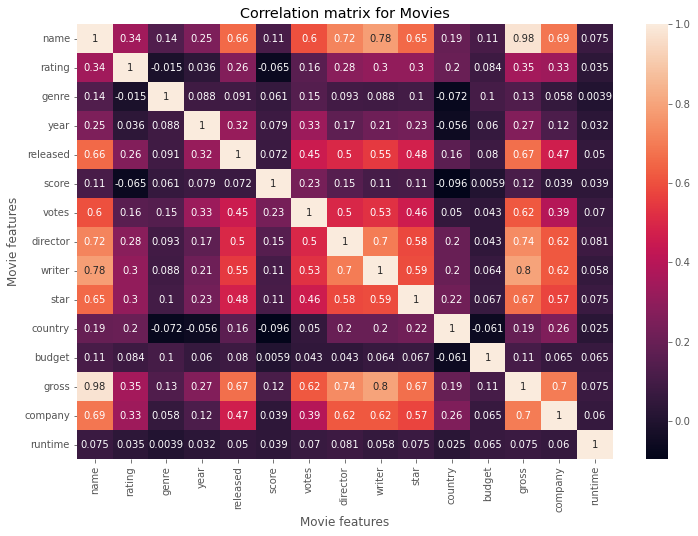

In [8]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [9]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.344538
         genre       0.138367
         year        0.253906
         released    0.656262
                       ...   
runtime  country     0.024827
         budget      0.064974
         gross       0.075178
         company     0.059739
         runtime     1.000000
Length: 225, dtype: float64


In [10]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country  score     -0.096042
score    country   -0.096042
country  genre     -0.072434
genre    country   -0.072434
rating   score     -0.065247
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [11]:
# Looking at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released  director    0.502084
director  released    0.502084
votes     writer      0.525249
writer    votes       0.525249
          released    0.546858
released  writer      0.546858
star      company     0.573670
company   star        0.573670
star      director    0.581049
director  star        0.581049
writer    star        0.590607
star      writer      0.590607
name      votes       0.599044
votes     name        0.599044
          gross       0.615089
gross     votes       0.615089
director  company     0.616906
company   director    0.616906
          writer      0.618775
writer    company     0.618775
star      name        0.653260
name      star        0.653260
released  name        0.656262
name      released    0.656262
released  gross       0.669825
gross     released    0.669825
          star        0.669963
star      gross       0.669963
name      company     0.686234
company   name        0.686234
director  writer      0.696227
writer    director    0.696227
gross   